# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

**Задание А**

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import seaborn as sns

from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\knyaz\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [365]:
df = pd.read_csv('telecom_churn.csv')

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [367]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [368]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [369]:
df.drop(['State', 'Area code'], axis = 1, inplace = True)

In [370]:
df['International plan'].replace({'No' : False, 'Yes' : True}, inplace = True)
df['Voice mail plan'].replace({'No' : False, 'Yes' : True}, inplace = True)

In [371]:
df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [372]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [374]:
def get_model_scores(y_test, y_train, y_test_pred, y_train_pred):
    accuracy = round(accuracy_score(y_test, y_test_pred), 4)
    print("Accuracy test score: " + str(accuracy))
    accuracy = round(accuracy_score(y_train, y_train_pred), 4)
    print("Accuracy train score: " + str(accuracy) + "\n")

    f1 = round(f1_score(y_test, y_test_pred), 4)
    print("f1 test score: " + str(f1))
    f1 = round(f1_score(y_train, y_train_pred), 4)
    print("f1 train score: " + str(f1) + "\n")

In [375]:
log_params = {'C' : np.arange(0.1, 1.1, 0.1)}
log_grid = GridSearchCV(LogisticRegression(max_iter = 10000), log_params, n_jobs = -1)

In [376]:
log_grid.fit(X_test, y_test)

GridSearchCV(estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [377]:
print(log_grid.best_params_)
print(log_grid.best_score_)

{'C': 0.30000000000000004}
0.861


In [378]:
log_model = LogisticRegression(C = log_grid.best_params_['C'])

log_pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', log_model)])
log_pipe.fit(X_test, y_test)

y_test_pred = log_pipe.predict(X_test)
y_train_pred = log_pipe.predict(X_train)

In [379]:
get_model_scores(y_test, y_train, y_test_pred, y_train_pred)

Accuracy test score: 0.865
Accuracy train score: 0.8543

f1 test score: 0.3662
f1 train score: 0.32



**Задание B**

In [380]:
SVC_params = {'C' : np.arange(0.1, 1.1, 0.1)}
SVC_grid = GridSearchCV(SVC(kernel = 'linear'), SVC_params, n_jobs = -1)

In [381]:
SVC_grid.fit(X_test, y_test)

GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [382]:
print(SVC_grid.best_params_)
print(SVC_grid.best_score_)

{'C': 1.0}
0.851


In [383]:
SVC_model = SVC(C = SVC_grid.best_params_['C'], kernel = 'linear')

SVC_pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', SVC_model)])
SVC_pipe.fit(X_test, y_test)

y_test_pred = SVC_pipe.predict(X_test)
y_train_pred = SVC_pipe.predict(X_train)

In [384]:
get_model_scores(y_test, y_train, y_test_pred, y_train_pred)

Accuracy test score: 0.851
Accuracy train score: 0.8568

f1 test score: 0.0
f1 train score: 0.0



**Задание С**

In [386]:
log_model = LogisticRegression(C = log_grid.best_params_['C'], max_iter = 10000)

log_pipe = Pipeline([
    ('poly_featurizer_', PolynomialFeatures(degree = 2)),
    ('scaler_', StandardScaler()),
    ('model_', log_model)])
log_pipe.fit(X_test, y_test)

y_test_pred = log_pipe.predict(X_test)
y_train_pred = log_pipe.predict(X_train)

In [387]:
get_model_scores(y_test, y_train, y_test_pred, y_train_pred)

Accuracy test score: 0.932
Accuracy train score: 0.9096

f1 test score: 0.7344
f1 train score: 0.643



In [388]:
SVC_model = SVC(C = SVC_grid.best_params_['C'], kernel = 'linear')

SVC_pipe = Pipeline([
    ('poly_featurizer_', PolynomialFeatures(degree = 2)),
    ('scaler_', StandardScaler()),
    ('model_', SVC_model)])
SVC_pipe.fit(X_test, y_test)

y_test_pred = SVC_pipe.predict(X_test)
y_train_pred = SVC_pipe.predict(X_train)

In [389]:
get_model_scores(y_test, y_train, y_test_pred, y_train_pred)

Accuracy test score: 0.938
Accuracy train score: 0.8993

f1 test score: 0.777
f1 train score: 0.6423



**Задание D**

<AxesSubplot:>

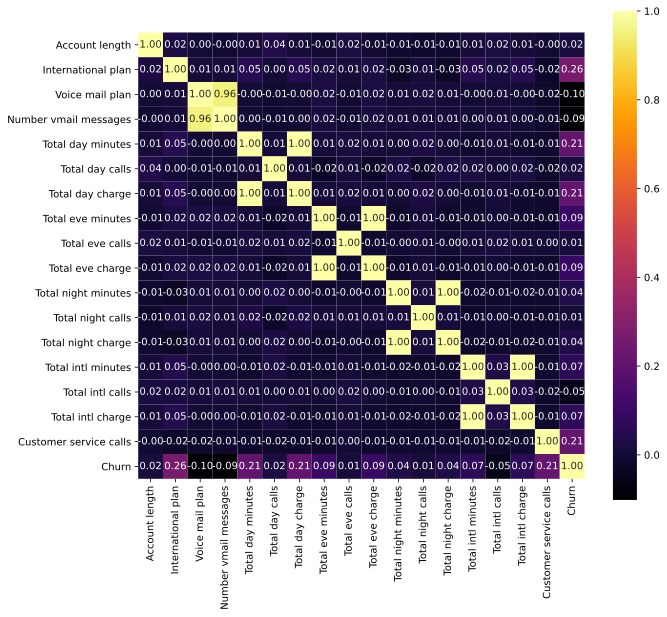

In [390]:
rcParams['figure.figsize'] = 10, 9
sns.heatmap(df.corr(), annot = True, square = True, fmt = '.2f', cmap = 'inferno')

In [391]:
df_clean = df.drop(['Voice mail plan', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], axis = 1)

In [392]:
X_clean = df_clean.drop(['Churn'], axis = 1)
y_clean = df_clean['Churn']

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size = 0.3)

In [394]:
log_model = LogisticRegression(C = log_grid.best_params_['C'])

log_pipe = Pipeline([
    ('poly_featurizer_', PolynomialFeatures(degree = 2)),
    ('scaler_', StandardScaler()),
    ('model_', log_model)])
log_pipe.fit(X_test, y_test)

y_test_pred = log_pipe.predict(X_test)
y_train_pred = log_pipe.predict(X_train)

In [395]:
get_model_scores(y_test, y_train, y_test_pred, y_train_pred)

Accuracy test score: 0.909
Accuracy train score: 0.8958

f1 test score: 0.6255
f1 train score: 0.5188



In [396]:
SVC_model = SVC(C = SVC_grid.best_params_['C'], kernel = 'linear')

SVC_pipe = Pipeline([
    ('poly_featurizer_', PolynomialFeatures(degree = 2)),
    ('scaler_', StandardScaler()),
    ('model_', SVC_model)])
SVC_pipe.fit(X_test, y_test)

y_test_pred = SVC_pipe.predict(X_test)
y_train_pred = SVC_pipe.predict(X_train)

In [397]:
get_model_scores(y_test, y_train, y_test_pred, y_train_pred)

Accuracy test score: 0.932
Accuracy train score: 0.9006

f1 test score: 0.7344
f1 train score: 0.5797



**Отчёт (Задача E)**

0.8766505397925338

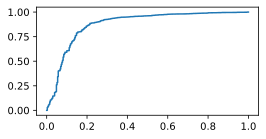

In [400]:
rcParams['figure.figsize'] = 4, 2
tpr, fpr, _ = roc_curve(y_train, log_pipe.predict_proba(X_train)[:, 0])
plt.plot(fpr, tpr)
auc(fpr, tpr)

**A**

Наилучшие результаты дал метод опорных векторов с полиномиальными признаками.

Accuracy = 0.8993

F1 = 0.6423

**B**

Для анализа были удалены признаки, связанные с количеством минут в разное время суток, так как они прямо коррелировали со стоимостью звонков в это же время.

По этой же причине был удалён признак vmail plan.

Были добавлены полиномиальные признаки второй степени

**С**

По итогу модель оказалась немного переобученной, но общее качество модели на тестовой выборки всё равно вышло довольно высоким

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [401]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [402]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [403]:
df.target.value_counts() / df.shape[0] * 100

0    55.442671
1    44.557329
Name: target, dtype: float64

Значений 0 немного больше, но в целом классы сбалансированы

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [404]:
matches = df[df.target == df.pred1_classes].shape[0]
print("Accuracy 1: " + str(matches / df.shape[0]))

matches = df[df.target == df.pred2_classes].shape[0]
print("Accuracy 2: " + str(matches / df.shape[0]))

matches = df[df.target == df.pred3_classes].shape[0]
print("Accuracy 3: " + str(matches / df.shape[0]))

Accuracy 1: 0.6618287373004355
Accuracy 2: 0.6719883889695211
Accuracy 3: 0.6400580551523948


Accuracy больше всего у алгоритма 2

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [405]:
TP = df[(df.target == 1) & (df.pred1_classes == 1)].shape[0]
FP = df[(df.target == 0) & (df.pred1_classes == 1)].shape[0]
FN = df[(df.target == 1) & (df.pred1_classes == 0)].shape[0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision 1: " + str(precision))
print("Recall 1: " + str(recall) + "\n")

TP = df[(df.target == 1) & (df.pred2_classes == 1)].shape[0]
FP = df[(df.target == 0) & (df.pred2_classes == 1)].shape[0]
FN = df[(df.target == 1) & (df.pred2_classes == 0)].shape[0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision 2: " + str(precision))
print("Recall 2: " + str(recall) + "\n")

TP = df[(df.target == 1) & (df.pred3_classes == 1)].shape[0]
FP = df[(df.target == 0) & (df.pred3_classes == 1)].shape[0]
FN = df[(df.target == 1) & (df.pred3_classes == 0)].shape[0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision 3: " + str(precision))
print("Recall 3: " + str(recall))

Precision 1: 0.6907216494845361
Recall 1: 0.4364820846905538

Precision 2: 0.6103542234332425
Recall 2: 0.7296416938110749

Precision 3: 0.6903225806451613
Recall 3: 0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [406]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [407]:
def display_conf_matrix(pred, title = "Confusion matrix"):
    cm = confusion_matrix(df.target, pred)
    plot_confusion_matrix(cm, df.target.unique(), title = title)

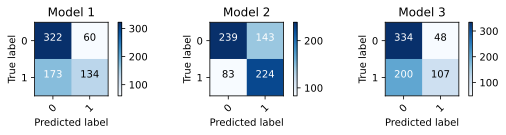

In [408]:
rcParams['figure.figsize'] = 8, 2

plt.subplot(1, 3, 1)
display_conf_matrix(df.pred1_classes, title = "Model 1")

plt.subplot(1, 3, 2)
display_conf_matrix(df.pred2_classes, title = "Model 2")

plt.subplot(1, 3, 3)
display_conf_matrix(df.pred3_classes, title = "Model 3")

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [409]:
def find_threshold_recall(probabilities, check_condition = True):
    thresh_recall = [[], []]
    for threshold in np.arange(0, 1.05, 0.05):
        TP = df[(df.target == 1) & (probabilities >= threshold)].shape[0]
        TN = df[(df.target == 0) & (probabilities < threshold)].shape[0]
        FN = df[(df.target == 1) & (probabilities < threshold)].shape[0]
        accuracy = (TP + TN) / df.shape[0]

        if (TP + FN == 0):
            continue
        recall = TP / (TP + FN)

        if (check_condition):
            if (accuracy >= 0.65):
                thresh_recall[0].append(threshold)
                thresh_recall[1].append(recall)
        else:
            thresh_recall[0].append(threshold)
            thresh_recall[1].append(recall)

    if (len(thresh_recall[1]) == 0):
        print("No threshold matching the conditions, returning None")
        return None
        
    max_recall = max(thresh_recall[1])
    print("Best recall: " + str(max_recall))
    threshold_i = thresh_recall[1].index(max_recall)
    return thresh_recall[0][threshold_i]

In [410]:
thresh_1 = find_threshold_recall(df.pred1_probs)
thresh_2 = find_threshold_recall(df.pred2_probs)
thresh_3 = find_threshold_recall(df.pred3_probs)

Best recall: 0.6579804560260586
Best recall: 0.8371335504885994
No threshold matching the conditions, returning None


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

If the threshold is None confussion matrix is skipped


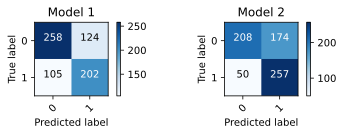

In [411]:
pred_1 = df.pred1_probs >= thresh_1
pred_2 = df.pred2_probs >= thresh_2
pred_3 = df.pred3_probs >= thresh_3

print("If the threshold is None confussion matrix is skipped")

rcParams['figure.figsize'] = 8, 2
if (thresh_1 != None):
    plt.subplot(1, 3, 1)
    display_conf_matrix(pred_1, title = "Model 1")
if (thresh_2 != None):
    plt.subplot(1, 3, 2)
    display_conf_matrix(pred_2, title = "Model 2")
if (thresh_3 != None):
    plt.subplot(1, 3, 3)
    display_conf_matrix(pred_3, title = "Model 3")

**Выводы:** По метрике recall наилучшей вышла модель 2

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [412]:
def find_threshold_precision(probabilities, check_condition = True):
    thresh_precision = [[], []]
    for threshold in np.arange(0, 1.05, 0.05):
        TP = df[(df.target == 1) & (probabilities >= threshold)].shape[0]
        TN = df[(df.target == 0) & (probabilities < threshold)].shape[0]
        FP = df[(df.target == 0) & (probabilities >= threshold)].shape[0]
        accuracy = (TP + TN) / df.shape[0]

        if (TP + FP == 0):
            continue
        precision = TP / (TP + FP)

        if (check_condition):
            if (accuracy >= 0.65):
                thresh_precision[0].append(threshold)
                thresh_precision[1].append(precision)
        else:
            thresh_precision[0].append(threshold)
            thresh_precision[1].append(precision)

    if (len(thresh_precision[1]) == 0):
        print("No threshold matching the conditions, returning None")
        return None
        
    max_precision = max(thresh_precision[1])
    print("Best precision: " + str(max_precision))
    threshold_i = thresh_precision[1].index(max_precision)
    return thresh_precision[0][threshold_i]

In [413]:
thresh_1 = find_threshold_precision(df.pred1_probs)
thresh_2 = find_threshold_precision(df.pred2_probs)
thresh_3 = find_threshold_precision(df.pred3_probs)

Best precision: 0.7328767123287672
Best precision: 0.8367346938775511
No threshold matching the conditions, returning None


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

If the threshold is None confussion matrix is skipped


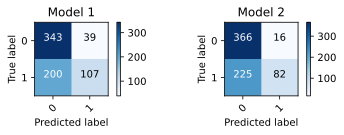

In [414]:
pred_1 = df.pred1_probs >= thresh_1
pred_2 = df.pred2_probs >= thresh_2
pred_3 = df.pred3_probs >= thresh_3

print("If the threshold is None confussion matrix is skipped")

rcParams['figure.figsize'] = 8, 2
if (thresh_1 != None):
    plt.subplot(1, 3, 1)
    display_conf_matrix(pred_1, title = "Model 1")
if (thresh_2 != None):
    plt.subplot(1, 3, 2)
    display_conf_matrix(pred_2, title = "Model 2")
if (thresh_3 != None):
    plt.subplot(1, 3, 3)
    display_conf_matrix(pred_3, title = "Model 3")

**Выводы:** По метрике precision наилучшей вышла модель 2

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [415]:
def find_threshold_f1(probabilities):
    thresh_f1 = [[], []]
    for threshold in np.arange(0, 1.05, 0.05):
        TP = df[(df.target == 1) & (probabilities >= threshold)].shape[0]
        TN = df[(df.target == 0) & (probabilities < threshold)].shape[0]
        FP = df[(df.target == 0) & (probabilities >= threshold)].shape[0]
        FN = df.shape[0] - TP - TN - FP

        if (TP + FN == 0):
            continue
        recall = TP / (TP + FN)

        if (TP + FP == 0):
            continue
        f1 = TP / (TP + FP)

        f1 = f1 * recall / (f1 + recall)

        thresh_f1[0].append(threshold)
        thresh_f1[1].append(f1)

    if (len(thresh_f1[1]) == 0):
        print("No threshold matching the conditions, returning None")
        return None
        
    max_f1 = max(thresh_f1[1])
    print("Best f1: " + str(max_f1))
    threshold_i = thresh_f1[1].index(max_f1)
    return thresh_f1[0][threshold_i]

In [416]:
thresh_1 = find_threshold_f1(df.pred1_probs)
thresh_2 = find_threshold_f1(df.pred2_probs)
thresh_3 = find_threshold_f1(df.pred3_probs)

Best f1: 0.3324175824175824
Best f1: 0.3482384823848239
Best f1: 0.32217090069284066


If the threshold is None confussion matrix is skipped


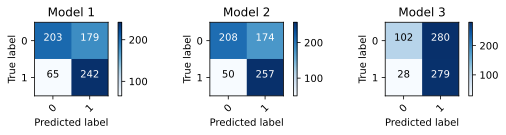

In [417]:
pred_1 = df.pred1_probs >= thresh_1
pred_2 = df.pred2_probs >= thresh_2
pred_3 = df.pred3_probs >= thresh_3

print("If the threshold is None confussion matrix is skipped")

rcParams['figure.figsize'] = 8, 2
if (thresh_1 != None):
    plt.subplot(1, 3, 1)
    display_conf_matrix(pred_1, title = "Model 1")
if (thresh_2 != None):
    plt.subplot(1, 3, 2)
    display_conf_matrix(pred_2, title = "Model 2")
if (thresh_3 != None):
    plt.subplot(1, 3, 3)
    display_conf_matrix(pred_3, title = "Model 3")

**Выводы:** По метрике precision наилучшей вышла модель 2

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [418]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [419]:
X = df.drop('target', axis = 1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [420]:
pipe = Pipeline([
    ("scaler_", StandardScaler()),
    ("model_", LogisticRegression())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler_', StandardScaler()),
                ('model_', LogisticRegression())])

In [421]:
log_probs = pipe.predict_proba(X)

In [422]:
log_probs_1 = []
for i in log_probs:
    log_probs_1.append(i[0])

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [423]:
thresh_precision = find_threshold_precision(log_probs_1, check_condition = False)
thresh_recall = find_threshold_recall(log_probs_1, check_condition = False)
thresh_f1 = find_threshold_f1(log_probs_1)

Best precision: 0.4455732946298984
Best recall: 1.0
Best f1: 0.30823293172690763


Логистическая регрессия справилась хуже, чем готовые модели